Model: "CIFAR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_filter1-1 (Conv2D)     (None, 32, 32, 32)        896       
                                                                 
 conv_filter1-2 (Conv2D)     (None, 32, 32, 32)        9248      
                                                                 
 max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)       0         
                                                                 
 dropout1 (Dropout)          (None, 16, 16, 32)        0         
                                                                 
 conv_filter2-1 (Conv2D)     (None, 16, 16, 64)        18496     
                                                                 
 conv_filter2-2 (Conv2D)     (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)         0     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
781/781 [==============================] - 48s 48ms/step - loss: 1.7316 - acc: 0.3617 - val_loss: 1.2990 - val_acc: 0.5287
Epoch 2/20
781/781 [==============================] - 37s 47ms/step - loss: 1.4012 - acc: 0.4925 - val_loss: 1.1301 - val_acc: 0.5908
Epoch 3/20
781/781 [==============================] - 36s 46ms/step - loss: 1.2598 - acc: 0.5501 - val_loss: 1.1398 - val_acc: 0.5918
Epoch 4/20
781/781 [==============================] - 36s 45ms/step - loss: 1.1762 - acc: 0.5782 - val_loss: 1.1317 - val_acc: 0.6101
Epoch 5/20
781/781 [==============================] - 36s 46ms/step - loss: 1.1106 - acc: 0.6067 - val_loss: 0.9986 - val_acc: 0.6518
Epoch 6/20
781/781 [==============================] - 36s 46ms/step - loss: 1.0580 - acc: 0.6243 - val_loss: 0.9198 - val_acc: 0.6739
Epoch 7/20
781/781 [==============================] - 35s 45ms/step - loss: 1.0146 - acc: 0.6431 - val_loss: 0.8228 - val_acc: 0.7130
Epoch 8/20
781/781 [==============================] - 35s 45ms

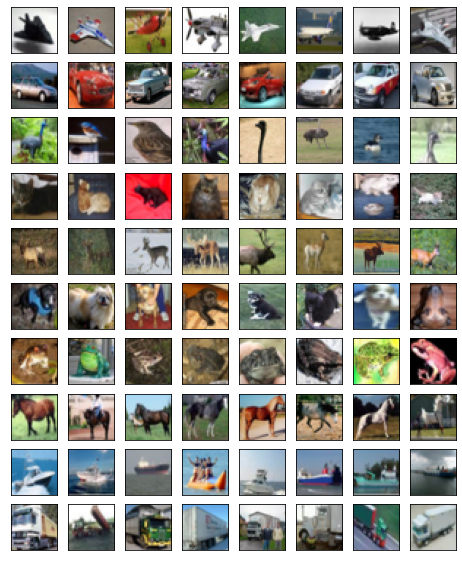

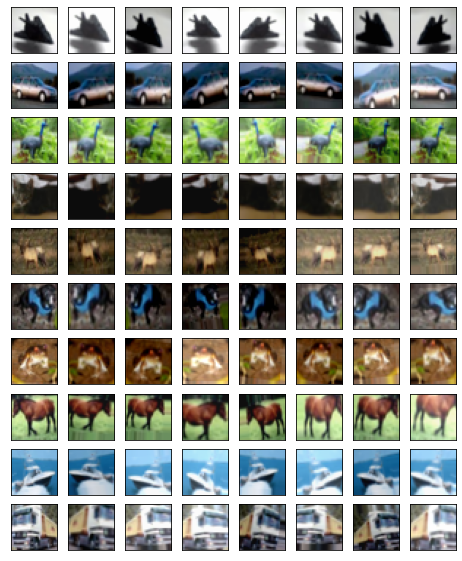

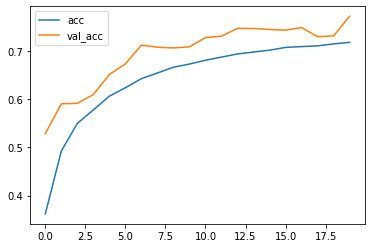

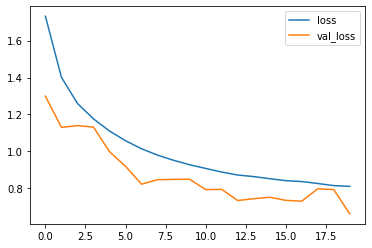

In [3]:
#CIFAR、畳み込みあり

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(0)
tf.random.set_seed(0)

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            c += 1
            subplot = fig.add_subplot(10, 8, c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(train_images[j])
            if c % 8 == 0:
                break

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            break
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(train_images[j])

    for _ in range(7):
        img = datagen.flow(np.array([train_images[j]]), batch_size=1)[0][0]
        c += 1
        subplot = fig.add_subplot(10, 8, c)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(img)

model = models.Sequential(name = "CIFAR")
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        input_shape=(32, 32, 3), #カラー画像であることに注意
                        name='conv_filter1-1'))
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Dropout(rate=0.25, name='dropout1')) # 25%のドロップアウトを入れる．
"""
大規模なネットワークでは過学習を起こしやすいのでいくつかのパラメータを使わないことで規模を小さくする
結果，複数のモデルを組み合わせることでアンサンブル効果を生み出している
"""

model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Dropout(rate=0.25, name='dropout2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

batch_size = 64
history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=20)

DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()


ValueError: ignored

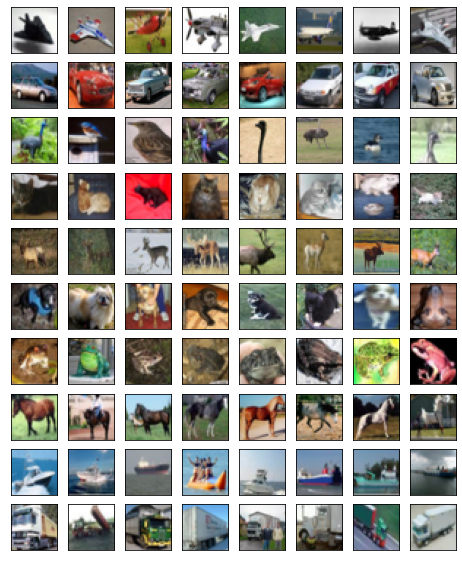

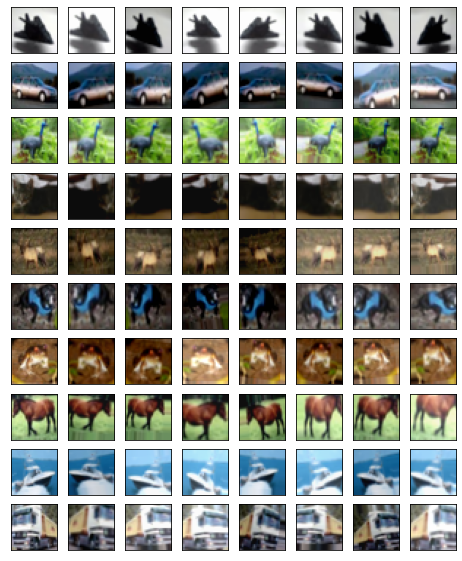

In [8]:
#CIFAR、畳み込みなし
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(0)
tf.random.set_seed(0)

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            c += 1
            subplot = fig.add_subplot(10, 8, c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(train_images[j])
            if c % 8 == 0:
                break

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            break
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(train_images[j])

    for _ in range(7):
        img = datagen.flow(np.array([train_images[j]]), batch_size=1)[0][0]
        c += 1
        subplot = fig.add_subplot(10, 8, c)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(img)

model = models.Sequential(name = "CIFAR")
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

batch_size = 64

history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=20)

DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()
